In [1]:
# from __future__ import print_function, division

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Part 1

In [17]:
import numpy as np 
import matplotlib.pyplot as plt

def gaussian(x, mean, var):
    return (1/np.sqrt(2*np.pi*var))*np.exp(-(x-mean)**2/(2*var))

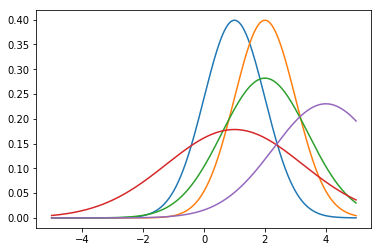

In [23]:
x = np.arange(-5, 5, 0.01)

y = gaussian(x, 1, 1)
y1 = gaussian(x, 2, 1) 
y2 = gaussian(x, 2, 2) 
y3 = gaussian(x, 1, 5) 
y4 = gaussian(x, 4, 3)

plt.plot(x,y) 
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3) 
plt.plot(x, y4) 

plt.show()

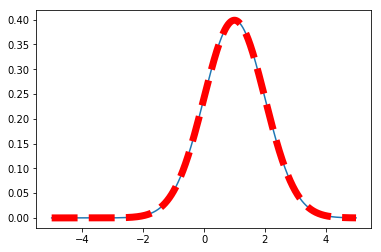

In [44]:
# TODO fit gaussians, with known parameters, here

# TODO plot result

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

''''

params, cov = optimize.curve_fit(gaussian, x, y)

xdata_points = np.linspace(-6, 10, 100)
plt.plot(xdata_points, gaussian(xdata_points, *params))
print(*params)
plt.plot(x,y,"or")

'''

p0 = [1, 1] 
coefs, covar = curve_fit(gaussian, x, y, p0=p0) 
y_fit = gaussian(x, *coefs) 
#dereferencing parameters with *

plt.plot(x, y) 
plt.plot(x, y_fit, 'r--', lw=7) 
plt.show()

In [40]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import optimize

''''

xdata = [-5, -3, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 3, 4, 10]
ydata = [.03, .23, 2.4, 2.45, 2.6, 2.7,2.8, 3, 3.1, 3.65, 4.76, 4.9, 5]

'''
def logistic(x, a, b, c):
    return a/(1+ np.exp(-b*(x-c)))
'''

params, cov = optimize.curve_fit(logistic, xdata, ydata)

xdata_points = np.linspace(-6, 10, 100)
plt.plot(xdata_points, logistic(xdata_points, *params))
print(*params)
plt.plot(xdata,ydata,"or")

'''

'\n\nparams, cov = optimize.curve_fit(logistic, xdata, ydata)\n\nxdata_points = np.linspace(-6, 10, 100)\nplt.plot(xdata_points, logistic(xdata_points, *params))\nprint(*params)\nplt.plot(xdata,ydata,"or")\n\n'

In [42]:
# TODO: load data here
lambda_units, signal = np.loadtxt('HDalpha_data', unpack=True)

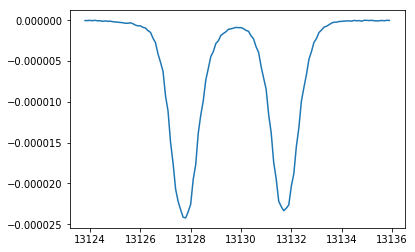

In [43]:
# TODO: plot it
plt.plot(lambda_units, signal) 
plt.show()

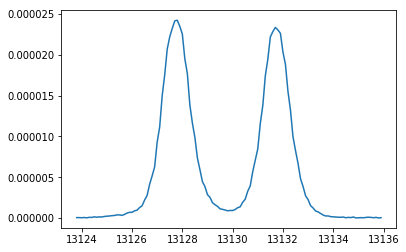

In [45]:
# TODO: plot data as emission signal
plt.plot(lambda_units, -signal) 
plt.show()

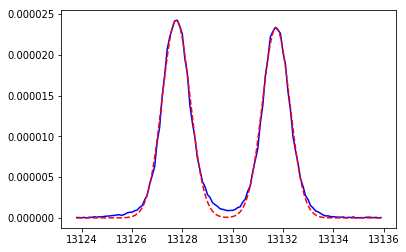

In [50]:
# TODO: fit a function to this data and plot it
def double_gaussian(x, a1, b1, c1, a2, b2, c2):
    u = (x-b1)/c1 
    v = (x-b2)/c2 
    return a1*(np.exp(-0.5*u*u)) + a2*(np.exp(-0.5*v*v)) 

plt.plot(lambda_units, -signal, 'b') 
x_arrA = np.linspace(min(lambda_units), max(lambda_units), 1000) 

p0_A_gauss = [-2.5e-5, 8+1.312e4, 0.1, -2.5e-5, 12+1.312e4, 0.1]  #guesses for the parameter values
coefs, covarA = curve_fit(double_gaussian, lambda_units, -signal, p0=p0_A_gauss) 
y_arrA = double_gaussian(x_arrA, *coefs) #dereferencing the coefficients

plt.plot(x_arrA, y_arrA, 'r--') 
plt.show()

# Part 2

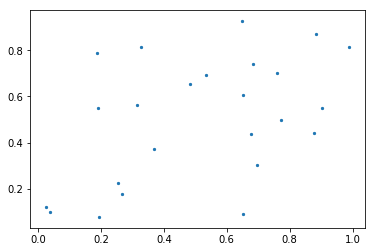

In [5]:
import random 
import matplotlib.pyplot as pltp

list1 = [] 
for i in range(100): 
    list1.append(random.random()) 

list2 = [] 
for i in range(100): 
    list2.append(random.random()) 

x1 = list1[0:24] 
x2 = list1[25:49] 
x3 = list1[50:74] 
x4 = list1[75:99] 

y1 = list2[0:24] 
y2 = list2[25:49] 
y3 = list2[50:74] 
y4 = list2[75:99] 

pltp.scatter(x1, y1, 5) 
pltp.show() 

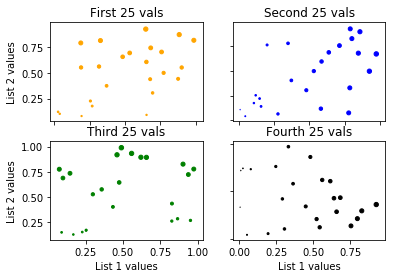

In [50]:
import numpy as np 

fig, axs = pltp.subplots(2, 2) 

s = [x*20 for x in y1] 
axs[0, 0].scatter(x1, y1, s = s , c = 'orange') 
axs[0, 0].set_title('First 25 vals') 

s2 = [x*20 for x in x2]
axs[0, 1].scatter(x2, y2, s = s2, c = 'blue')
axs[0, 1].set_title('Second 25 vals')

s3 = [x*20 for x in y3] 
axs[1, 0].scatter(x3, y3, s = s3, c = 'green')
axs[1, 0].set_title('Third 25 vals') 

s4 = [x*20 for x in x4] 
axs[1, 1].scatter(x4, y4, s = s4, c = 'black') 
axs[1, 1].set_title('Fourth 25 vals') 

for ax in axs.flat:
    ax.set(xlabel='List 1 values', ylabel='List 2 values') 

for ax in axs.flat: 
    ax.label_outer() 

# Part 3

In [11]:
def flux_for_dipole(x_pos, y_pos, Q_vals, X, Y):
    """
    Returns the flux based on the information of the charges
    and the grid of the plot.
    Code modified from Physics 113, written by Blas Cabrera
    """
    flux = np.zeros((len(X), len(Y)))
    x_m = np.outer(np.ones((X.size)), X); 
    y_m = np.outer(Y, np.ones((Y.size))); 
    for n in range(len(Q_vals)):
        flux += 2*np.pi*Q_vals[n]*(1 - (x_pos[n]-x_m)/np.sqrt((y_pos[n]-y_m)**2+(x_pos[n]-x_m)**2))
    return flux

In [12]:
# TODO create arrays of information

# TODO get flux

# TODO plot contours of the flux